# Outlier Detection

The next step covers the outlier detection with regards to the features. 

In [54]:
# Importing Packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
from scipy.stats import pearsonr


In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [3]:
# Importing Data
data_hedonic_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/2 FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')
data_utilitarian_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/2 FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

# Combining data in one dataframe
data= pd.concat([data_hedonic_raw, data_utilitarian_raw])
data_helpful = data[data['helpful_vote'] != 0]


In [4]:
# Filtering after only helpful reviews
data_hedonic = data_hedonic_raw[data_hedonic_raw['helpful_vote'] != 0]
data_utilitarian = data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] != 0]

# 1. Outlier Detection and Removal

In [14]:
# Define numerical columns
numerical_columns = ['RewExt', 'Sentiment', 'Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
                      'NounR', 'AdjR', 'AdvR', 'FRE','Rating']

In [15]:
# Test for normality using Shapiro-Wilk test
normality_tests = {}

for col in numerical_columns:
    shapiro_test = stats.shapiro(data[col])
    shapiro_statistic = shapiro_test.statistic
    shapiro_pvalue = shapiro_test.pvalue
    
    normality_tests[col] = {
        'Shapiro-Wilk': {'Statistic': shapiro_statistic, 'p-value': shapiro_pvalue}
    }

# Print normality test results
for col, test_results in normality_tests.items():
    print(f"--- {col} ---")
    print(f"Shapiro-Wilk Test: Statistic={test_results['Shapiro-Wilk']['Statistic']:.4f}, p-value={test_results['Shapiro-Wilk']['p-value']:.4f}")
    print("\n")


--- RewExt ---
Shapiro-Wilk Test: Statistic=0.6913, p-value=0.0000


--- Sentiment ---
Shapiro-Wilk Test: Statistic=0.6218, p-value=0.0000


--- Subjective ---
Shapiro-Wilk Test: Statistic=0.8290, p-value=0.0000


--- WordC ---
Shapiro-Wilk Test: Statistic=0.5537, p-value=0.0000


--- SentC ---
Shapiro-Wilk Test: Statistic=0.6372, p-value=0.0000


--- SentL ---
Shapiro-Wilk Test: Statistic=0.7305, p-value=0.0000


--- TitleL ---
Shapiro-Wilk Test: Statistic=0.2992, p-value=0.0000


--- ElapDays ---
Shapiro-Wilk Test: Statistic=0.9461, p-value=0.0000


--- NounR ---
Shapiro-Wilk Test: Statistic=0.8860, p-value=0.0000


--- AdjR ---
Shapiro-Wilk Test: Statistic=0.8690, p-value=0.0000


--- AdvR ---
Shapiro-Wilk Test: Statistic=0.8007, p-value=0.0000


--- FRE ---
Shapiro-Wilk Test: Statistic=0.9445, p-value=0.0000




In [16]:
# Outlier Transformation using Isolation Forest for non-normalized data
from sklearn.ensemble import IsolationForest

# Define numerical columns of interest
numerical_columns = ['Rating', 'RewExt', 'Sentiment', 'Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
                      'NounR', 'AdjR', 'AdvR', 'FRE']

# Initialize Isolation Forest
clf = IsolationForest(contamination=0.015)

# Fit Isolation Forest on numerical columns
outlier_preds = clf.fit_predict(data_hedonic_raw[numerical_columns])

# Identify outliers
outliers = data_hedonic_raw[outlier_preds == -1]
clean_data_hedonic = data_hedonic_raw[outlier_preds == 1]

# Print results
print(f"Number of outliers detected: {len(outliers)}")
print(f"Shape of cleaned data: {clean_data_hedonic.shape}")


Number of outliers detected: 282
Shape of cleaned data: (18456, 42)


In [9]:
#clean_data_hedonic.to_csv ("/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final_Cleaned.csv",index=False)

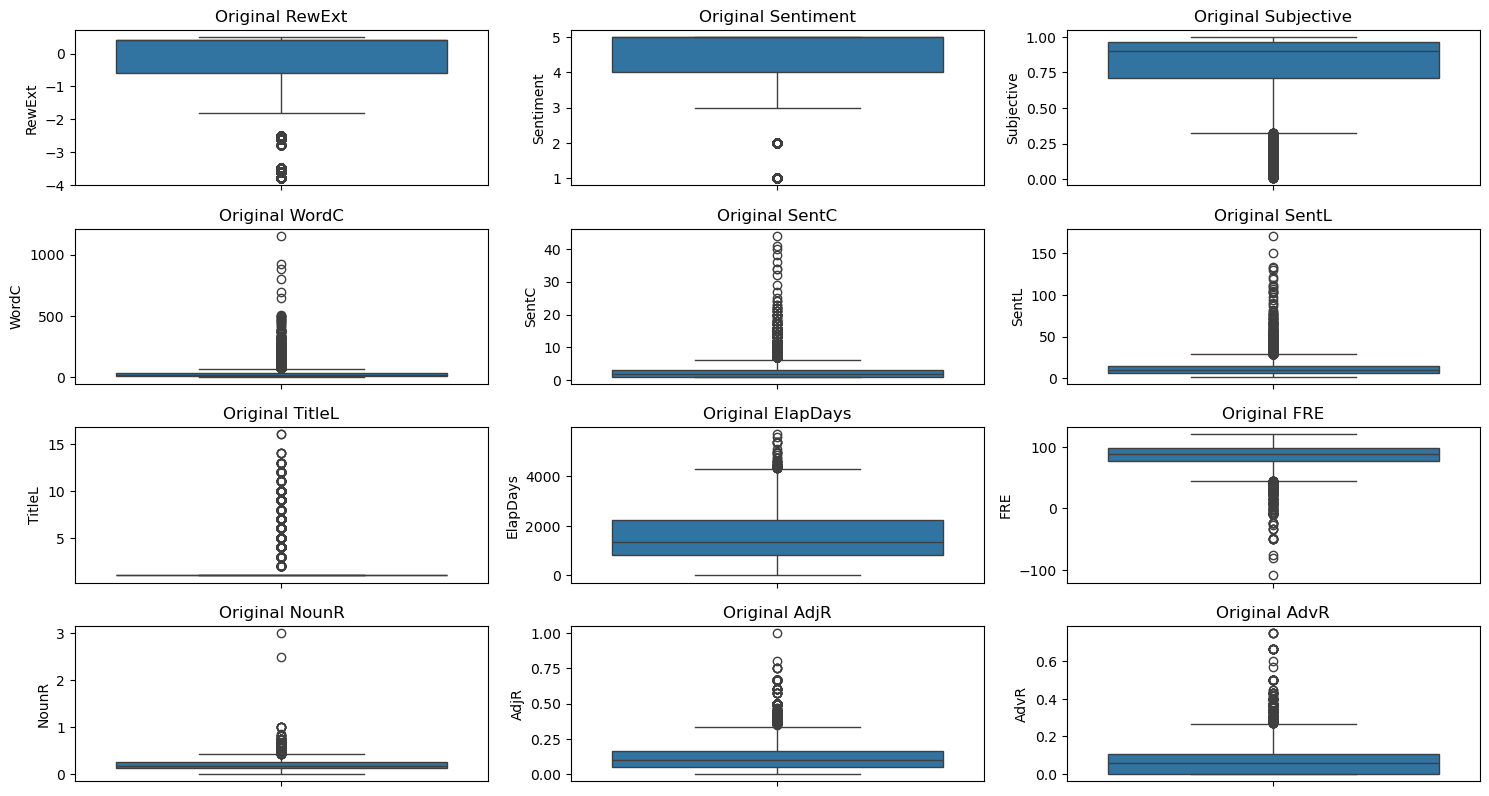

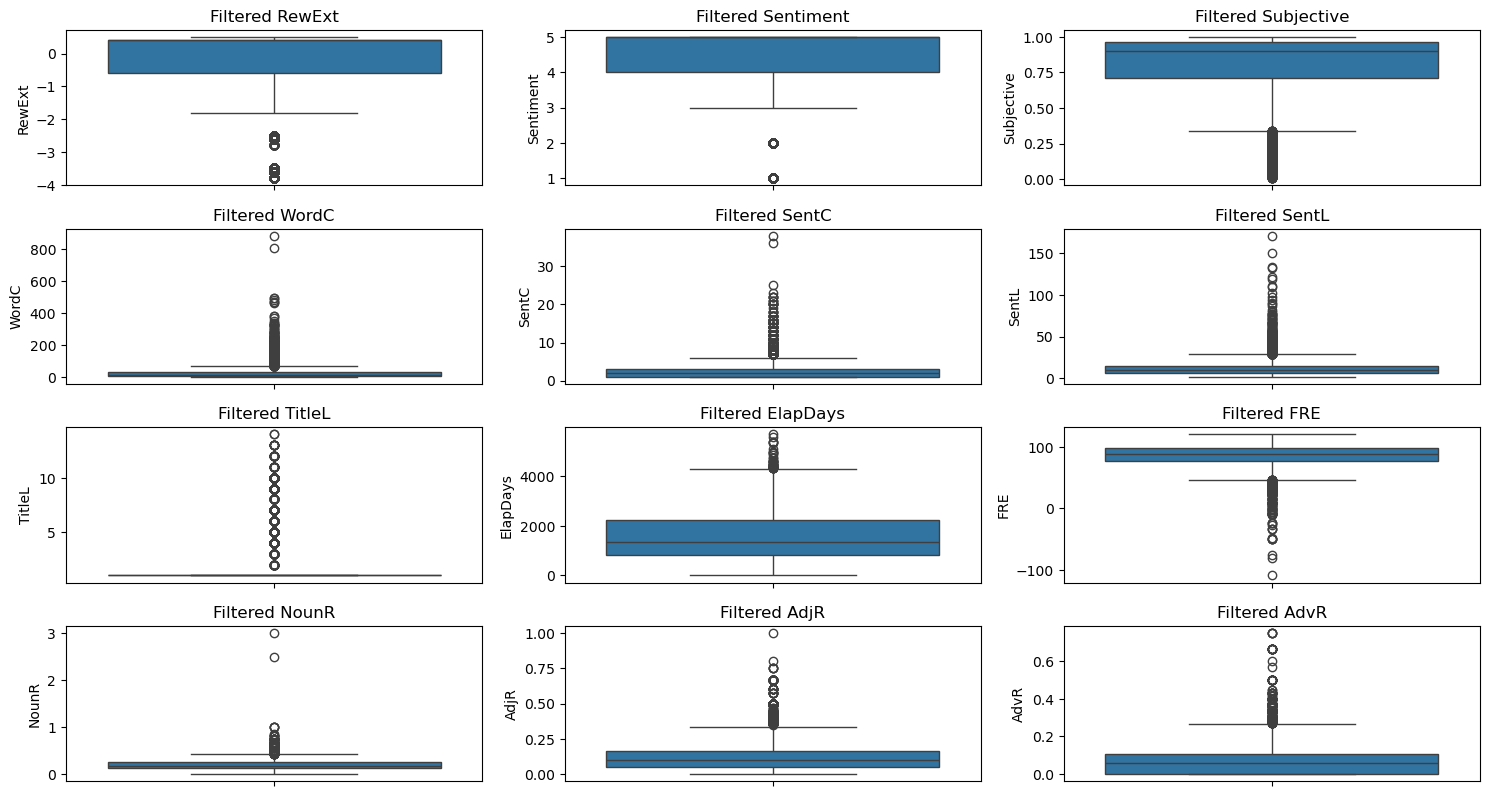

In [37]:
numerical_columns = ['RewExt', 'Sentiment', 'Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
                      'FRE','NounR', 'AdjR', 'AdvR', ]

# Plot the original data
plt.figure(figsize=(15, 10))
#plt.suptitle("Feature distribution in the original hedonic dataset", fontsize=16, )
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=data_hedonic_raw[col])
    plt.title(f'Original {col}')
plt.tight_layout()
plt.show()

# Plot the filtered data
plt.figure(figsize=(15, 10))
#plt.suptitle("Feature distributio in the hedonic dataset with outlier removal", fontsize=16,)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=clean_data_hedonic[col])
    plt.title(f'Filtered {col}')
plt.tight_layout()
plt.show()


In [12]:
from sklearn.ensemble import IsolationForest

# Define numerical columns of interest
numerical_columns = ['Rating', 'RewExt', 'Sentiment', 'Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
                      'NounR', 'AdjR', 'AdvR', 'FRE']

# Initialize Isolation Forest
clf = IsolationForest(contamination=0.008)

# Fit Isolation Forest on numerical columns
outlier_preds = clf.fit_predict(data_utilitarian_raw[numerical_columns])

# Identify outliers
outliers = data_utilitarian_raw[outlier_preds == -1]
clean_data_utilitarian = data_utilitarian_raw[outlier_preds == 1]

# Print results
print(f"Number of outliers detected: {len(outliers)}")
print(f"Shape of cleaned data: {clean_data_utilitarian.shape}")


Number of outliers detected: 147
Shape of cleaned data: (18154, 42)


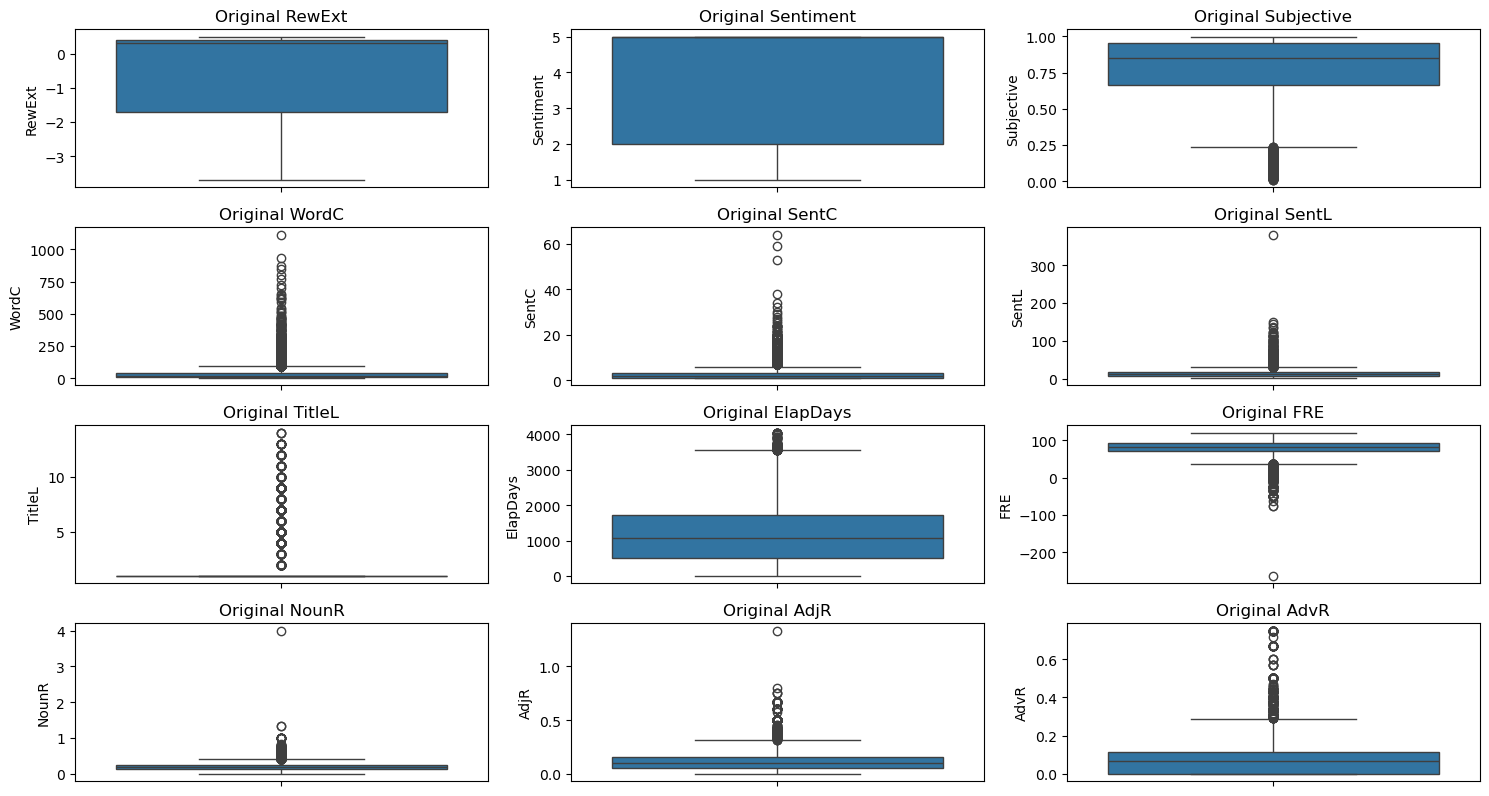

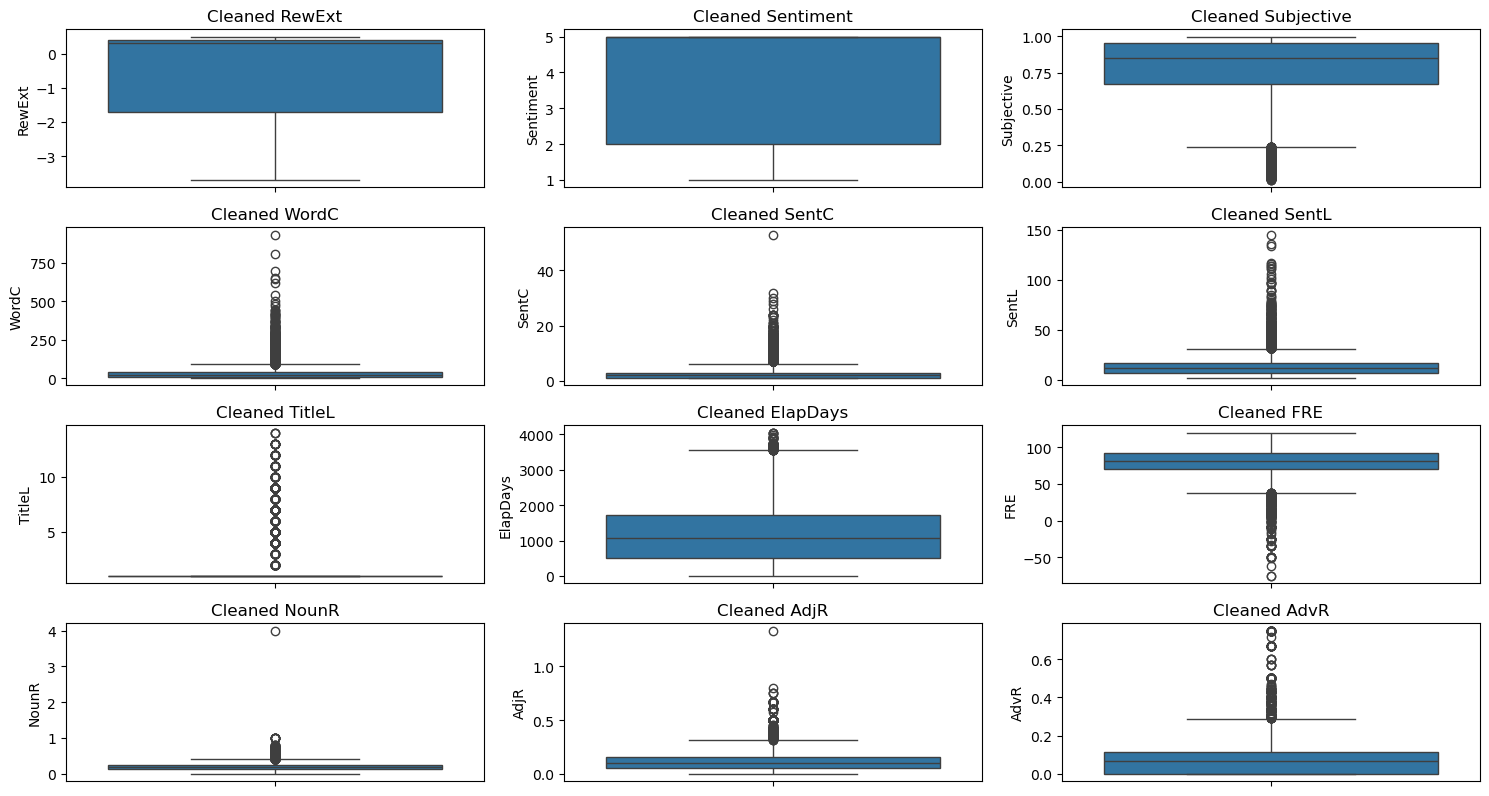

In [20]:
# Define numerical columns
numerical_columns = ['RewExt', 'Sentiment', 'Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
                      'FRE','NounR', 'AdjR', 'AdvR', ]


# Plot the original data
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=data_utilitarian_raw[col])
    plt.title(f'Original {col}')
plt.tight_layout()
plt.show()

# Plot the filtered data
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=clean_data_utilitarian[col])
    plt.title(f'Cleaned {col}')
plt.tight_layout()
plt.show()


In [13]:
#clean_data_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final_Cleaned.csv', index=False)